<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonFinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading and Cleaning (Data Conversion might be Needed)


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl



**Import Data**

In [3]:
url = "https://raw.githubusercontent.com/AndrewPiasecki/PythonFinalProject/main/IMBD_Data.csv"
df = pd.read_csv(url)

df

,ID,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,11-Dec-01,James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,11-Dec-70,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1-Jan-70,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,25-Jan-70,Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,4-Feb-70,Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,11-Sep-20,Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,30-Jun-21,Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,1-Feb-21,Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,1-Jul-21,Adam Robitel


**Find the Columns with empty Values**

In [4]:


emptyCols = [col for col in df.columns if df[col].isnull().any()]

if not emptyCols:
    print("No columns have empty data.")
else:
    print("Columns with empty data:")
    for col in emptyCols:
        print(f"\t- {col}")


Columns with empty data:
	- gross
	- releaseDate


**Remove Rows with Empty Column Values**

In [5]:
df = df.dropna(subset=emptyCols)

df.head()

,ID,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,11-Dec-01,James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,11-Dec-70,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1-Jan-70,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,25-Jan-70,Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,4-Feb-70,Franklin J. Schaffner


**Test If Columns have been Removed**

In [6]:
emptyCols = [col for col in df.columns if df[col].isnull().any()]

if not emptyCols:
    print("No columns have empty data.")
else:
    print("Columns with empty data:")
    for col in emptyCols:
        print(f"\t- {col}")

No columns have empty data.


**Remove Uneeded Column**


In [7]:
df = df.drop('isAdult', axis = 1)

df.head()

,ID,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,11-Dec-01,James Mangold
1,tt0065421,The Aristocats,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,11-Dec-70,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1-Jan-70,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,25-Jan-70,Robert Altman
4,tt0066206,Patton,Patton,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,4-Feb-70,Franklin J. Schaffner


In [9]:
df.dtypes

ID                 object
primaryTitle       object
originalTitle      object
runtimeMinutes      int64
genres             object
averageRating     float64
numVotes            int64
budget              int64
gross             float64
releaseDate        object
directors          object
dtype: object

# Descriptive Statistics (Basic Histograms)


**Mean**

In [18]:
meanAR = round(df['averageRating'].mean(), 2)
meanAR

6.74

**Mode**

In [19]:
modeAR = round(df['averageRating'].mode(), 2)
modeAR

0    6.5
Name: averageRating, dtype: float64

**Standard Deviation**

In [21]:
standardDeviationAR = round(df['averageRating'].std(), 2)
standardDeviationAR

0.88

**Histogram(s)**

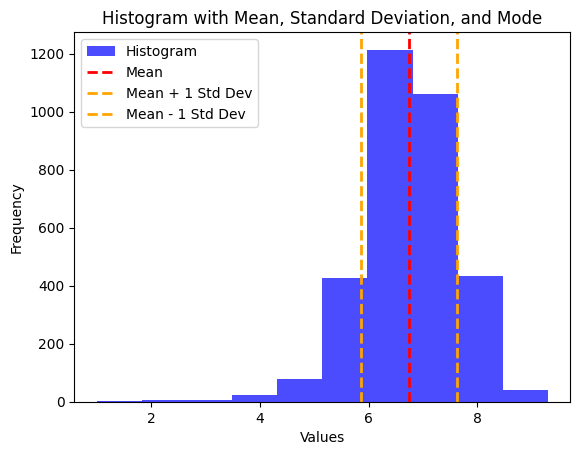

In [24]:
plt.hist(df['averageRating'], bins = 10, color = 'blue', alpha = 0.7, label = 'Histogram')
plt.axvline(meanAR, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(meanAR + standardDeviationAR, color='orange', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.axvline(meanAR - standardDeviationAR, color='orange', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
## plt.axvline(modeAR, color='green', linestyle='dashed', linewidth=2, label='Mode')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Mean, Standard Deviation, and Mode')


plt.legend()


plt.show()